In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
diamonds = pd.read_csv('diamonds_original.csv')

In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [ ]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])

In [ ]:
s = pd.Series(classColumn)
diamonds.reset_index(inplace=True)
diamonds.drop('index', axis='columns', inplace=True)
diamonds['class'] = s
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


In [ ]:
feature_names = ['carat', 'price']

In [ ]:
X_full = diamonds[feature_names]
X_full

,carat,price
0,1.26,6546.0
1,0.80,3030.0
2,0.56,1915.0
3,1.51,6936.0
4,0.33,646.0
...,...,...
53935,1.02,4796.0
53936,0.93,3750.0
53937,0.30,491.0
53938,0.36,807.0


In [ ]:
y = diamonds['class']
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
53935        [0, 5000]
53936        [0, 5000]
53937        [0, 5000]
53938        [0, 5000]
53939        [0, 5000]
Name: class, Length: 53940, dtype: object

In [ ]:
undersampler = RandomUnderSampler(random_state = 42)

In [ ]:
X_undersampled, y_undersampled = undersampler.fit_resample(X_full, y)

In [ ]:
X_undersampled

,carat,price
0,1.54,11795.0
1,2.45,11830.0
2,1.14,10878.0
3,1.30,12932.0
4,1.52,11206.0
...,...,...
6615,0.91,3936.0
6616,0.70,1966.0
6617,0.30,665.0
6618,0.43,792.0


In [ ]:
X = X_undersampled
X

,carat,price
0,1.54,11795.0
1,2.45,11830.0
2,1.14,10878.0
3,1.30,12932.0
4,1.52,11206.0
...,...,...
6615,0.91,3936.0
6616,0.70,1966.0
6617,0.30,665.0
6618,0.43,792.0


In [ ]:
y = y_undersampled

In [ ]:
y.value_counts()

(10000, 15000]    1655
(5000, 10000]     1655
15000+            1655
[0, 5000]         1655
Name: class, dtype: int64

In [ ]:
class_to_num = {'[0, 5000]' : 0, '(5000, 10000]' : 1, '(10000, 15000]' : 2, '15000+' : 3}
num_to_class =  {0 : '[0, 5000]', 1 : '(5000, 10000]', 2 : '(10000, 15000]', 3 :'15000+'}

def to_num(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(class_to_num[i])
  return pd.Series(temp, index=temp_index, name='class')

def to_cat(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(num_to_class[i])
  return pd.Series(temp, index=temp_index, name='class')

In [ ]:
y_true = to_num(y)
y_true

0       2
1       2
2       2
3       2
4       2
       ..
6615    0
6616    0
6617    0
6618    0
6619    0
Name: class, Length: 6620, dtype: int64

In [ ]:
y_true.value_counts()

2    1655
1    1655
3    1655
0    1655
Name: class, dtype: int64

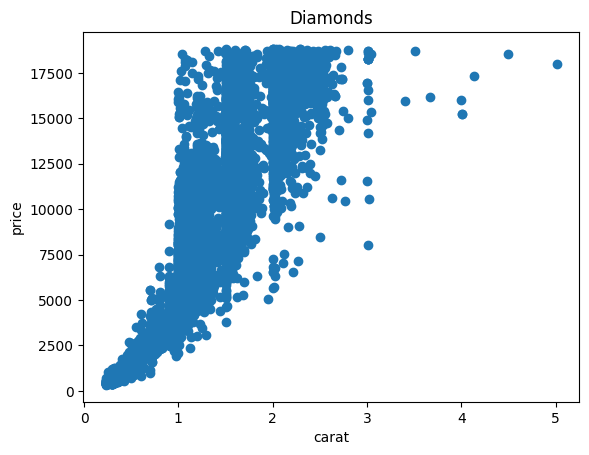

In [ ]:
plt.scatter(X['carat'], X['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title("Diamonds")
plt.show()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,carat,price
0,0.274059,0.620046
1,0.464435,0.621939
2,0.190377,0.570471
3,0.223849,0.681516
4,0.269874,0.588203
...,...,...
6615,0.142259,0.195167
6616,0.098326,0.088663
6617,0.014644,0.018327
6618,0.041841,0.025193


***

# Izvestaj i poredjenje modela

In [ ]:
km = joblib.load('KM.pkl')
aggc = joblib.load('AGGC.pkl')
dbs = joblib.load('DBS.pkl')
sc = joblib.load('SC.pkl')

In [ ]:
models = [km, aggc, dbs, sc]

In [ ]:
colors = ['#1A70C5', '#FD8109', '#09B144', '#C50404']

In [ ]:
for model in models:
  print(type(model))

<class 'sklearn.cluster._kmeans.KMeans'>
<class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>
<class 'sklearn.cluster._dbscan.DBSCAN'>
<class 'sklearn.cluster._spectral.SpectralClustering'>


###Silhouette score


Silhouette koeficijent je metrika za evaluaciju kvaliteta klasterovanja. Ova metrika meri koliko dobro je svaki objekat dodeljen odgovarajucem klasteru, uzimajuci u obzir gustinu i razdvajanje klastera. Silhouette koeficijent se izracunava za svaki objekat i predstavlja prosecnu vrednost za sve objekte u skupu podataka.
Vrednosti Silhouette koeficijenta se krecu u opsegu od -1 do 1. Vece vrednosti Silhouette koeficijenta ukazuju na bolje klasterovanje, pri cemu vrednost bliska 1 ukazuje na dobro definisane i odvojene klastera, dok vrednost bliska -1 ukazuje na objekte koji su pogresno dodeljeni klasterima.


In [ ]:
silhouette_scores = []
model_names = ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering']
for model in models:
  silhouette_scores.append(silhouette_score(X, model.labels_))

silhouette_scores

[0.5727961180921346,
 0.6177384361729406,
 0.2525381594513957,
 0.5196358287705952]

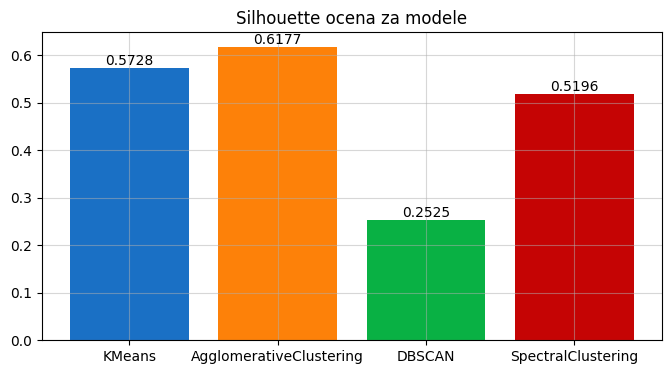

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, silhouette_scores, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(silhouette_scores):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Silhouette ocena za modele')
plt.show()

### Dunn index


Ova metrika meri razdvajanje izmedju klastera i gustocu objekata unutar klastera. Visoke vrednosti Dunn indeksa ukazuju na dobro odvojene klastera i dobru gustinu unutar klastera, dok niske vrednosti ukazuju na manje jasno definisane klastera i vecu rasprsenost objekata.
Vrednosti Dunn indeksa se krecu u opsegu od 0 do pozitivne beskonacnosti. Vise vrednosti Dunn indeksa ukazuju na bolje klasterovanje, pri cemu vece vrednosti ukazuju na bolje razdvajanje izmedju klastera i vecu gustocu unutar klastera.


In [ ]:
from scipy.spatial.distance import pdist, squareform

def dunn_index(X, labels):
    inter_cluster_dist = np.min(squareform(pdist(X))[labels != labels[:, np.newaxis]])
    intra_cluster_dist = np.max([np.max(pdist(X[labels == i])) for i in np.unique(labels)])
    dunn_index = inter_cluster_dist / intra_cluster_dist
    
    return dunn_index

In [ ]:
dunn_indexes = []
for model in models:
  dunn_indexes.append(dunn_index(X, model.labels_))

dunn_indexes

[0.0006347256663000913,
 0.004999664129340144,
 0.02172094494011698,
 0.0018115445086096204]

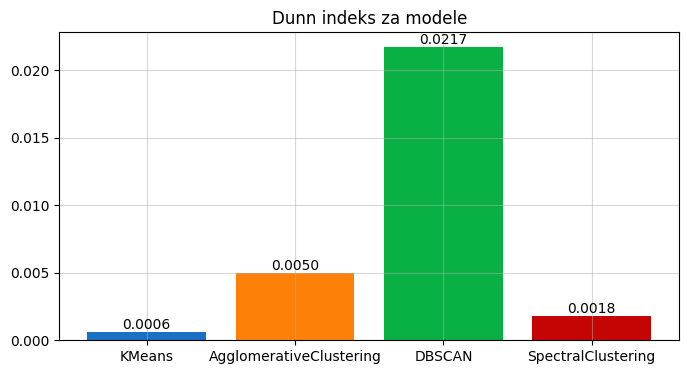

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, dunn_indexes, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(dunn_indexes):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Dunn indeks za modele')
plt.show()

Mozemo uociti da **DBSCAN** daje daleko bolje rezultate po *Dunn index*-u.

### Rand score

Rand indeks je metrika koja se koristi za merenje slicnosti izmedju predvidjenih klastera i stvarnih klasa (ukoliko su dostupne). Ova metrika ocenjuje koliko su tacno klasteri modela uskladjeni sa pravim klasama.
Vrednosti Rand indeksa se krecu u opsegu od 0 do 1. Vece vrednosti Rand indeksa ukazuju na vecu slicnost izmedju predvidjenih klastera i stvarnih klasa, dok vrednost bliska 0 ukazuje na losu uskladjenost.


In [ ]:
from sklearn.metrics import adjusted_rand_score

def calculate_rand_index(labels_true, labels_pred):
    labels_true = np.array(labels_true)
    labels_pred = np.array(labels_pred)
    rand_index = adjusted_rand_score(labels_true, labels_pred)
    
    return rand_index

In [ ]:
rand_indexes = []
for model in models:
  rand_indexes.append(calculate_rand_index(y_true, model.labels_))

rand_indexes

[0.7533975323571106,
 0.4850645248431483,
 1.204683112839615e-05,
 0.4392603323447809]

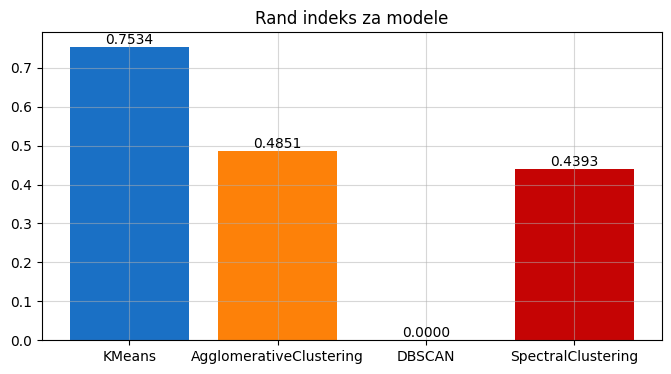

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, rand_indexes, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(rand_indexes):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Rand indeks za modele')
plt.show()

### Intra-cluster distances

Intra-klaster rastojanje je metrika koja se koristi za merenje prosecne udaljenosti izmedju objekata unutar istog klastera. Ova metrika ocenjuje kompaktnost i gustinu klastera tako sto racuna prosecno rastojanje izmedju svih parova objekata unutar istog klastera.
Manje vrednosti intra-klaster rastojanja ukazuju na bolje klasterovanje, jer ukazuju na to da su objekti unutar klastera blizi jedni drugima.


In [ ]:
from sklearn.metrics import pairwise_distances

def calculate_intra_cluster_distance(X, labels):
    distances = pairwise_distances(X)
    intra_cluster_distance = 0.0
  
    unique_labels = set(labels)
    for label in unique_labels:
        indices = (labels == label)
        intra_cluster_distance += np.sum(distances[np.ix_(indices, indices)])
    
    return intra_cluster_distance

In [ ]:
intra_distances = []
for model in models:
  intra_distances.append(calculate_intra_cluster_distance(X, model.labels_))

intra_distances

[1193123.756084723, 4423067.567549434, 17060414.938813742, 2838448.5516167437]

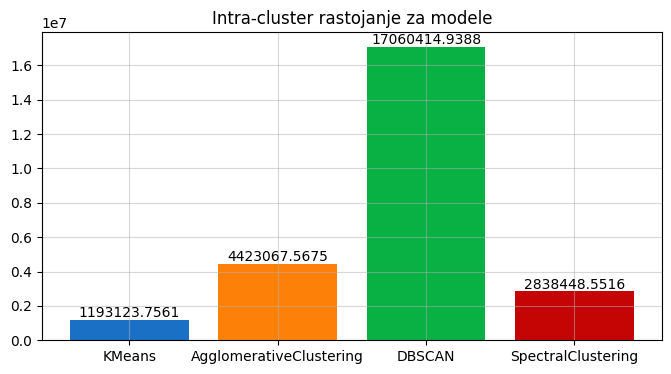

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, intra_distances, color=colors)
plt.grid(alpha=0.5)
for i, s in enumerate(intra_distances):
    plt.text(model_names[i], s, f'{s:.4f}', ha='center', va='bottom')
plt.title('Intra-cluster rastojanje za modele')
plt.show()

***

### Balansiranost predvidjenih klastera

In [ ]:
pieColors = ['#C99CE5', '#7FDDB3', '#7AC5E2', '#FFF4B3']

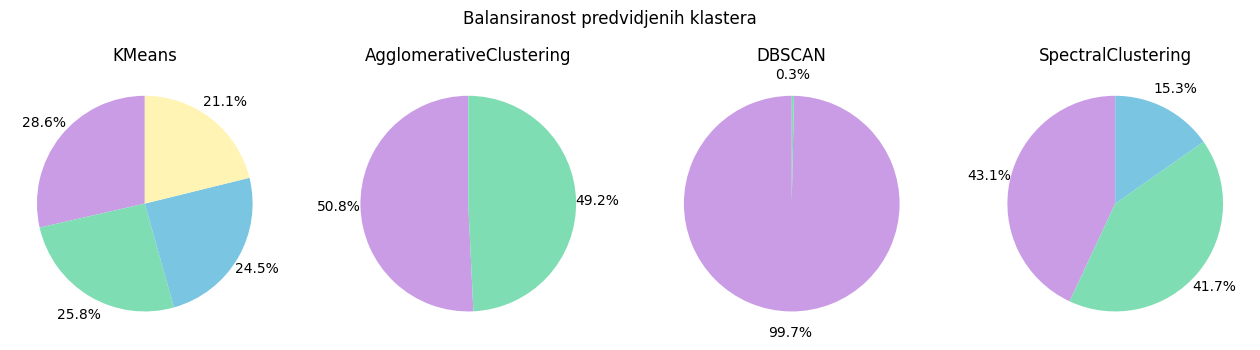

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.suptitle('Balansiranost predvidjenih klastera')
idx = 1
for i, model in enumerate(models):
  
  pieData = pd.Series(model.labels_).value_counts()
  pieData.reset_index(drop=True, inplace=True)
  p = fig.add_subplot(1, 4, idx)
  idx += 1
  p.set_title(model_names[i])

  plt.pie(pieData, startangle= 90, autopct= '%.1f%%', pctdistance=1.2, colors=pieColors)

plt.show()


**KMeans** nam pokazuje da postoje 4 solidno balansirana klastera. Odgovara nasem klasifikacionom problemu, sto potvrdjuje da je podela na 4 opsega cene dobra odluka.  
**AgglomerativeClustering** nam pokazuje dobru podelu na dva klastera cija je odlicna balansiranost.  
**DBSCAN** nam pokazuje da ipak postoji velika neuravnotezenost po odredjenom atributu. Taj atribut je *carat*.  
**SpectralClustering** nam pokazuje da postoji jedna koncentrisana grupa, verovatno najprosecniji dijamanti.

### Runtimes and scalability

In [ ]:
import time

In [ ]:
X1 = X_full.head(50000)
X2 = diamonds[['carat', 'price']].head(50000)

In [ ]:
X1 = pd.DataFrame(scaler.fit_transform(X1), columns = feature_names)


In [ ]:
data_full = pd.concat([X1, X2], ignore_index=True)
data_full.shape

(100000, 2)

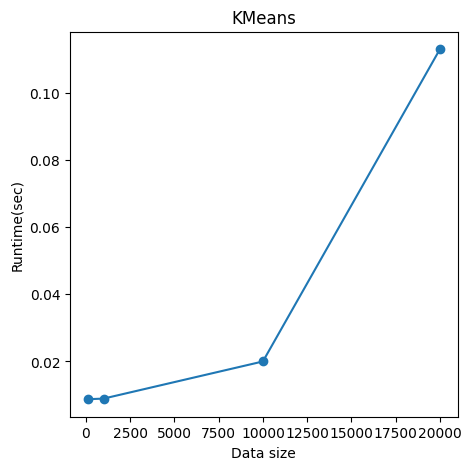

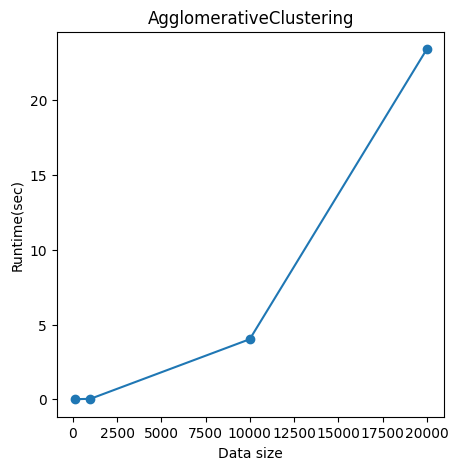

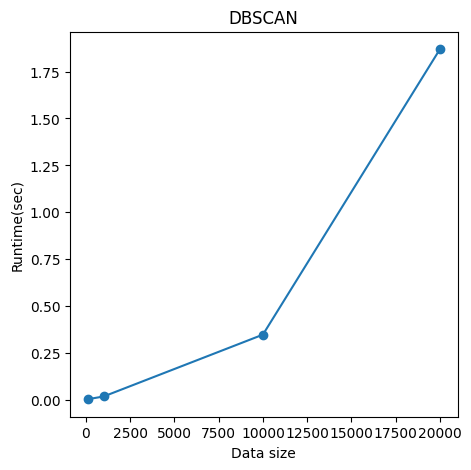

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


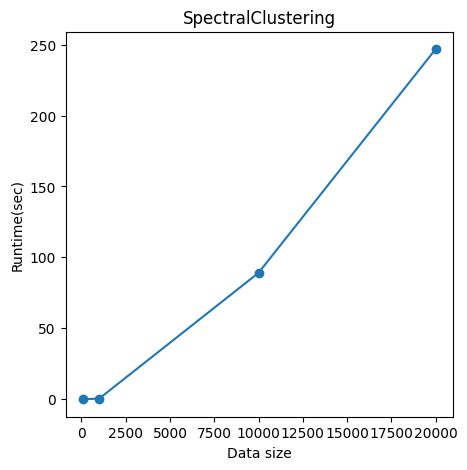

In [ ]:
data_sizes = [100, 1000, 10000, 20000]
for i, model in enumerate(models):
  runtimes = []
  for size in data_sizes:
      data = data_full.head(size) 
      
      start_time = time.time()
      model.fit(data)
      end_time = time.time()
      runtime = end_time - start_time

      runtimes.append(runtime)

  plt.figure(figsize=(5, 5))
  plt.plot(data_sizes, runtimes, marker='o')
  plt.title(model_names[i])
  plt.xlabel('Data size')
  plt.ylabel('Runtime(sec)')
  plt.show()

Mozemo uociti da je **KMeans** ubedljivo najbrzi.